In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
!ls drive/MyDrive/Colab\ Notebooks/tmnist

dataframe_creator_min_5_fonts_english.ipynb
font_compare.ipynb
font_to_png.ipynb
input
main_english.ipynb
main.ipynb
main_pytorch.ipynb
old_font_compare.ipynb
pytorch_tmist_english_glyphgan_v2.ipynb


In [33]:
!cp -r drive/MyDrive/Colab\ Notebooks/tmnist/input ./

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim
import re
import seaborn as sns
sns.set_theme(color_codes=True)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./input/min_5_fonts_english.csv
./input/devnagari_data.csv
./input/Glyphs_TMNIST_updated.csv
./input/googlefontslist.txt


In [5]:
csvname = './input/Glyphs_TMNIST_updated.csv'
df = pd.read_csv(csvname)
cols = df.font_name.unique()

In [5]:
print(cols)

['ABeeZee-Regular' 'ABeeZee-Italic' 'Abel-Regular' ...
 'NotoSerifTibetan[wght]' 'RedactedScript-Regular' 'RedactedScript-Bold']


### The sans list and sans serif list has been obtained from font_to_png.ipynb

In [6]:
serif_list = ['Alegreya',
 'Andada Pro',
 'Besley',
 'Bitter',
 'Bodoni Moda',
 'Brygada 1918',
 'Crimson Pro',
 'EB Garamond',
 'Faustina',
 'Fraunces',
 'Ibarra Real Nova',
 'Josefin Slab',
 'Literata',
 'Lora',
 'Manuale',
 'Newsreader',
 'Noto Serif Display',
 'Noto Serif Tamil',
 'Petrona',
 'Piazzolla',
 'Playfair Display',
 'Rasa',
 'STIX Two Text',
 'Texturina',
 'Vollkorn',
 'Yrsa']
serif_list = [i.replace(' ', '') for i in serif_list]
serif_list

['Alegreya',
 'AndadaPro',
 'Besley',
 'Bitter',
 'BodoniModa',
 'Brygada1918',
 'CrimsonPro',
 'EBGaramond',
 'Faustina',
 'Fraunces',
 'IbarraRealNova',
 'JosefinSlab',
 'Literata',
 'Lora',
 'Manuale',
 'Newsreader',
 'NotoSerifDisplay',
 'NotoSerifTamil',
 'Petrona',
 'Piazzolla',
 'PlayfairDisplay',
 'Rasa',
 'STIXTwoText',
 'Texturina',
 'Vollkorn',
 'Yrsa']

In [7]:
sans_serif_list = [
 'Alumni Sans',
 'Archivo',
 'Archivo Narrow',
 'Arimo',
 'Asap',
 'Cabin',
 'Cuprum',
 'Epilogue',
 'Exo',
 'Exo 2',
 'Genos',
 'Georama',
 'Glory',
 'Josefin Sans',
 'Jost',
 'Karla',
 'Kufam',
 'Libre Franklin',
 'Merriweather Sans',
 'Mohave',
 'Montserrat',
 'Mulish',
 'Noto Sans Display',
 'Nunito',
 'Open Sans',
 'Overpass',
 'Public Sans',
 'Raleway',
 'Red Hat Display',
 'Red Hat Text',
 'Roboto Serif',
 'Rosario',
 'Rubik',
 'Source Sans 3',
 'Source Serif 4',
 'Urbanist',
 'Work Sans']
sans_serif_list = [i.replace(' ', '') for i in sans_serif_list]

#### The following fonts are not in the dataset

In [8]:
m = []
for j in sans_serif_list:
  for i in df['font_name'].unique():
    if j in i:
      m.append(j)
      break
      
set(sans_serif_list).difference(set(m))

{'Arimo', 'Genos', 'OpenSans', 'RobotoSerif', 'SourceSans3', 'SourceSerif4'}

In [9]:
len(sans_serif_list)+len(serif_list)

63

In [10]:
'|'.join(sans_serif_list)

'AlumniSans|Archivo|ArchivoNarrow|Arimo|Asap|Cabin|Cuprum|Epilogue|Exo|Exo2|Genos|Georama|Glory|JosefinSans|Jost|Karla|Kufam|LibreFranklin|MerriweatherSans|Mohave|Montserrat|Mulish|NotoSansDisplay|Nunito|OpenSans|Overpass|PublicSans|Raleway|RedHatDisplay|RedHatText|RobotoSerif|Rosario|Rubik|SourceSans3|SourceSerif4|Urbanist|WorkSans'

In [11]:
df[df.font_name.str.contains('|'.join(sans_serif_list))].font_name.unique()

array(['AlumniSans-Italic[wght]', 'AlumniSans[wght]',
       'Archivo[wdth,wght]', 'Archivo-Italic[wdth,wght]',
       'ArchivoBlack-Regular', 'ArchivoNarrow[wght]',
       'ArchivoNarrow-Italic[wght]', 'ArchivoVFBeta-Italic',
       'ArchivoVFBeta', 'Asap[wght]', 'Asap-Italic[wght]',
       'AsapCondensed-BoldItalic', 'AsapCondensed-Bold',
       'AsapCondensed-SemiBold', 'AsapCondensed-Medium',
       'AsapCondensed-Regular', 'AsapCondensed-MediumItalic',
       'AsapCondensed-Italic', 'AsapCondensed-SemiBoldItalic',
       'AsapVFBeta-Italic', 'AsapVFBeta', 'AsapVFBeta-Condensed',
       'Cabin-Italic[wdth,wght]', 'Cabin[wdth,wght]',
       'CabinCondensed-Bold', 'CabinCondensed-Regular',
       'CabinCondensed-SemiBold', 'CabinCondensed-Medium',
       'CabinSketch-Bold', 'CabinSketch-Regular', 'CabinVFBeta-Italic',
       'CabinVFBeta', 'Cuprum-Italic[wght]', 'Cuprum[wght]',
       'Epilogue-Italic[wght]', 'Epilogue[wght]', 'Exo-Italic[wght]',
       'Exo[wght]', 'Exo2-Italic[wght

In [12]:
sans_serifdf = df[df.font_name.str.contains('|'.join(sans_serif_list))]
sans_serifdf = sans_serifdf[sans_serifdf.label == 'A']
sans_serifdf

font_name              glyph_name label  ...  782  783  784
18597     AlumniSans-Italic[wght]  LATIN CAPITAL LETTER A     A  ...    0    0    0
18810            AlumniSans[wght]  LATIN CAPITAL LETTER A     A  ...    0    0    0
26212          Archivo[wdth,wght]  LATIN CAPITAL LETTER A     A  ...    0    0    0
26339   Archivo-Italic[wdth,wght]  LATIN CAPITAL LETTER A     A  ...    0    0    0
26466        ArchivoBlack-Regular  LATIN CAPITAL LETTER A     A  ...    0    0    0
...                           ...                     ...   ...  ...  ...  ...  ...
437565           RubikOne-Regular  LATIN CAPITAL LETTER A     A  ...    0    0    0
529969             Urbanist[wght]  LATIN CAPITAL LETTER A     A  ...    0    0    0
530077      Urbanist-Italic[wght]  LATIN CAPITAL LETTER A     A  ...    0    0    0
535246      WorkSans-Italic[wght]  LATIN CAPITAL LETTER A     A  ...    0    0    0
535372             WorkSans[wght]  LATIN CAPITAL LETTER A     A  ...    0    0    0

[166 rows x 787 columns]

In [13]:
serifdf = df[df.font_name.str.contains('|'.join(serif_list))]
serifdf = serifdf[serifdf.label == 'A']
serifdf

font_name              glyph_name label  ...  782  783  784
4374             Alegreya[wght]  LATIN CAPITAL LETTER A     A  ...    0    0    0
4630      Alegreya-Italic[wght]  LATIN CAPITAL LETTER A     A  ...    0    0    0
4896     AlegreyaSans-ExtraBold  LATIN CAPITAL LETTER A     A  ...    0    0    0
5176        AlegreyaSans-Italic  LATIN CAPITAL LETTER A     A  ...    0    0    0
5466    AlegreyaSans-ThinItalic  LATIN CAPITAL LETTER A     A  ...    0    0    0
...                         ...                     ...   ...  ...  ...  ...  ...
533465      VollkornSC-SemiBold  LATIN CAPITAL LETTER A     A  ...    0    0    0
533677       VollkornSC-Regular  LATIN CAPITAL LETTER A     A  ...    0    0    0
533889          VollkornSC-Bold  LATIN CAPITAL LETTER A     A  ...    0    0    0
539690        Yrsa-Italic[wght]  LATIN CAPITAL LETTER A     A  ...    0    0    0
539817               Yrsa[wght]  LATIN CAPITAL LETTER A     A  ...    0    0    0

[100 rows x 787 columns]

In [14]:
serifdf['classname'] = 'serif'
sans_serifdf['classname'] = 'sans_serif'

df = pd.concat([serifdf, sans_serifdf])
df = df.reindex(columns=['classname', *serifdf.columns.values[:-1]])

In [15]:
df

classname                font_name  ... 783 784
4374         serif           Alegreya[wght]  ...   0   0
4630         serif    Alegreya-Italic[wght]  ...   0   0
4896         serif   AlegreyaSans-ExtraBold  ...   0   0
5176         serif      AlegreyaSans-Italic  ...   0   0
5466         serif  AlegreyaSans-ThinItalic  ...   0   0
...            ...                      ...  ...  ..  ..
437565  sans_serif         RubikOne-Regular  ...   0   0
529969  sans_serif           Urbanist[wght]  ...   0   0
530077  sans_serif    Urbanist-Italic[wght]  ...   0   0
535246  sans_serif    WorkSans-Italic[wght]  ...   0   0
535372  sans_serif           WorkSans[wght]  ...   0   0

[266 rows x 788 columns]

In [16]:
X = df.iloc[:, 4:]
y = df.iloc[:, 0]

In [17]:
images_scaled = StandardScaler().fit_transform(X)
images_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


In [19]:
tsne = TSNE(n_components=2, perplexity=40.0)
tsne_result = tsne.fit_transform(images_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [20]:
tsne_result_scaled = StandardScaler().fit_transform(tsne_result)

In [21]:
def visualize_scatter(data_2d, label_ids, figsize=(12,12), title=''):
    plt.figure(figsize=figsize)
    plt.grid()
    
    nb_classes = len(np.unique(label_ids))
    
    for label_id in np.unique(label_ids):
        plt.scatter(data_2d[np.where(label_ids == label_id), 0],
                    data_2d[np.where(label_ids == label_id), 1],
                    marker='o',
                    # color= plt.cm.Set1(label_id / float(nb_classes)),
                    linewidth='1',
                    alpha=0.8,
                    label=label_id)
    plt.legend(loc='best')
    plt.title(title, fontdict={'fontsize': 24})



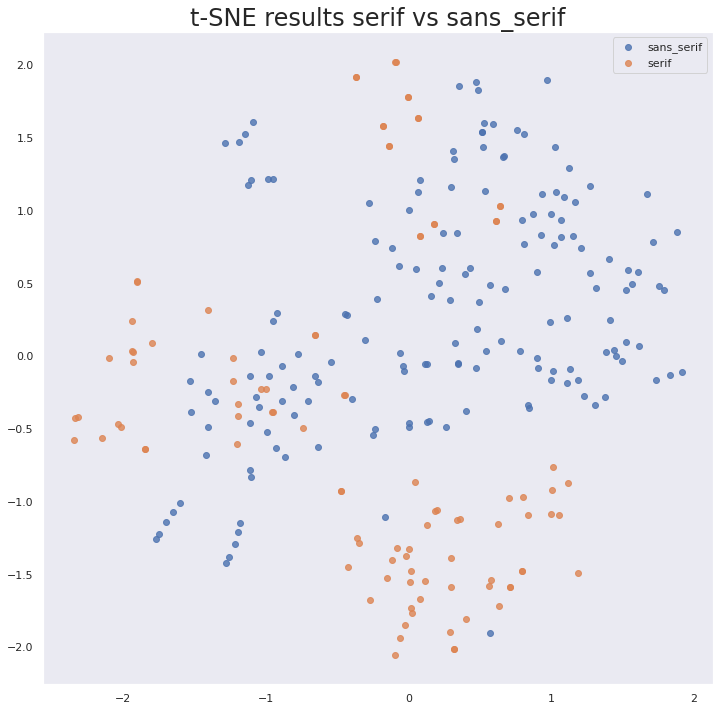

In [22]:
visualize_scatter(tsne_result_scaled, y, title='t-SNE results serif vs sans_serif')

In [23]:
def get_A_font_by_name(font_name, aindex=0):
  return df[df['font_name'].str.contains(font_name)].iloc[aindex][4:].astype(np.uint8).values.reshape(28, 28)

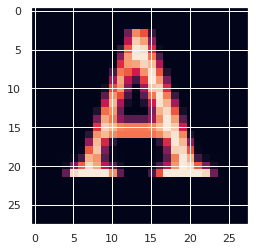

In [24]:
plt.imshow(get_A_font_by_name('Faustina'))
faustinadf = get_A_font_by_name('Faustina')

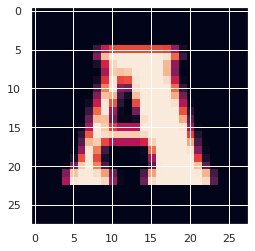

In [25]:
plt.imshow(get_A_font_by_name('Fraunces'))
frauncedf = get_A_font_by_name('Fraunces')

In [26]:
mean_squared_error(get_A_font_by_name(re.escape('Faustina')), get_A_font_by_name('AlegreyaSans-ExtraBold'))

32.2780612244898

In [27]:
from math import log10, sqrt
  
def PSNR(original, compressed):
    mse = mean_squared_error(original, compressed)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [28]:
PSNR(frauncedf, faustinadf)

32.91738766000928

In [29]:
ssim(frauncedf, faustinadf)

0.5071314703228424

In [30]:
df.head()

classname                font_name              glyph_name  ... 782  783  784
4374     serif           Alegreya[wght]  LATIN CAPITAL LETTER A  ...   0    0    0
4630     serif    Alegreya-Italic[wght]  LATIN CAPITAL LETTER A  ...   0    0    0
4896     serif   AlegreyaSans-ExtraBold  LATIN CAPITAL LETTER A  ...   0    0    0
5176     serif      AlegreyaSans-Italic  LATIN CAPITAL LETTER A  ...   0    0    0
5466     serif  AlegreyaSans-ThinItalic  LATIN CAPITAL LETTER A  ...   0    0    0

[5 rows x 788 columns]

In [31]:
def generate_mse_error_columns(df):
    pairs = np.array(list(combinations(df.iloc[:, 4:].values, 2)))
    namepairs = np.array(list(combinations(df['font_name'].values, 2)))
    mselist = []
    psnrlist = []
    ssimlist=[]
    table = {r : { c : 0 for c in df['font_name'].unique()} for r in df['font_name'].unique()}
    for ind, i in enumerate(pairs):
        mselist.append(mean_squared_error(i[0], i[1]))
        psnrlist.append(PSNR(i[0], i[1]))
        ssimlist.append(ssim(i[0].reshape(28, 28), i[1].reshape(28, 28)))
        pp = namepairs[ind]
        table[namepairs[ind][0]][namepairs[ind][1]] = mean_squared_error(get_A_font_by_name(re.escape(pp[0])), get_A_font_by_name(re.escape(pp[1])))
    mselist = np.array(mselist)
    print(f"mselist shape is {mselist.shape}")
    psnrlist = np.array(psnrlist)
    ssimlist = np.array(ssimlist)
    table = pd.DataFrame(table)
    return table

In [32]:
htable = generate_mse_error_columns(df)

mselist shape is (35245,)


In [33]:
htable

Alegreya[wght]  ...  WorkSans[wght]
Alegreya[wght]                 0.000000  ...               0
Alegreya-Italic[wght]         26.150510  ...               0
AlegreyaSans-ExtraBold        35.264031  ...               0
AlegreyaSans-Italic           30.517857  ...               0
AlegreyaSans-ThinItalic       29.290816  ...               0
...                                 ...  ...             ...
RubikOne-Regular              35.190051  ...               0
Urbanist[wght]                26.710459  ...               0
Urbanist-Italic[wght]         30.568878  ...               0
WorkSans-Italic[wght]         32.132653  ...               0
WorkSans[wght]                29.741071  ...               0

[266 rows x 266 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(0.5, 0.98, 'MSE clustermap')

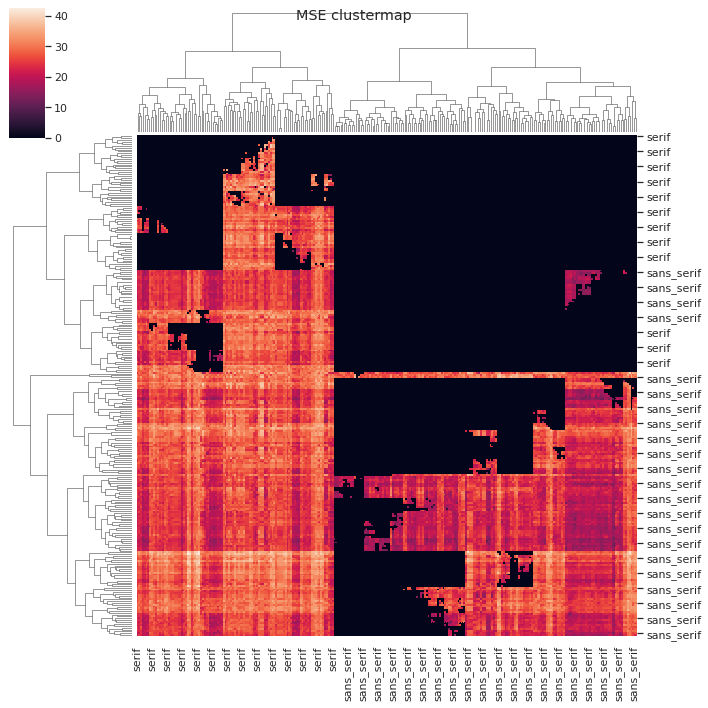

In [53]:
sns.clustermap(htable).fig.suptitle('MSE clustermap') 

In [35]:
temp=htable.index
temp

Index(['Alegreya[wght]', 'Alegreya-Italic[wght]', 'AlegreyaSans-ExtraBold',
       'AlegreyaSans-Italic', 'AlegreyaSans-ThinItalic',
       'AlegreyaSans-BlackItalic', 'AlegreyaSans-Light',
       'AlegreyaSans-BoldItalic', 'AlegreyaSans-Black',
       'AlegreyaSans-MediumItalic',
       ...
       'RedHatText-Italic[wght]', 'Rosario-Italic[wght]', 'Rosario[wght]',
       'Rubik[wght]', 'Rubik-Italic[wght]', 'RubikOne-Regular',
       'Urbanist[wght]', 'Urbanist-Italic[wght]', 'WorkSans-Italic[wght]',
       'WorkSans[wght]'],
      dtype='object', length=266)

In [36]:
htable.columns =  ['serif' if re.match('|'.join(serif_list), i) else 'sans_serif' for i in htable.columns ]
htable.index =  ['serif' if re.match('|'.join(serif_list), i) else 'sans_serif' for i in htable.index ]

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


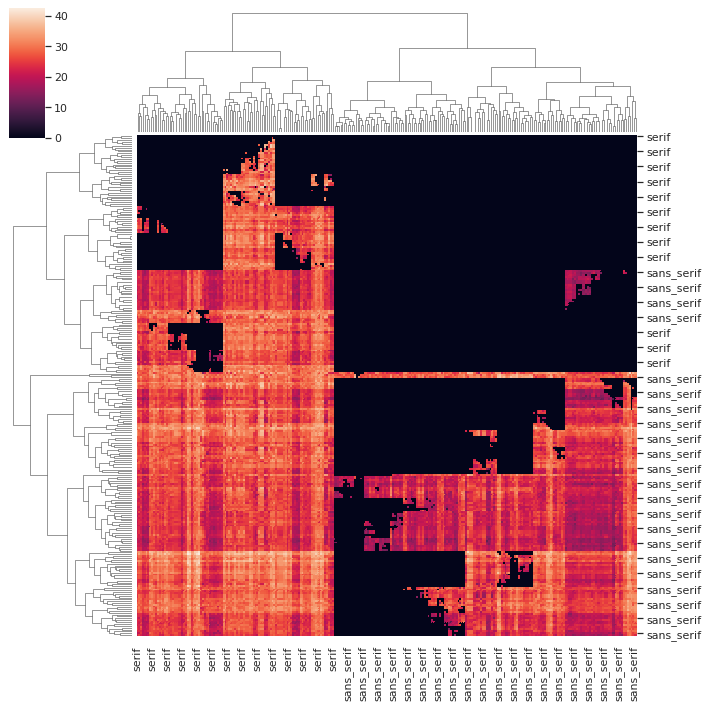

In [37]:

sns.clustermap(htable)

In [38]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 300, 300

ax = sns.heatmap(htable)

plt.savefig('heatmap.png', dpi=100)

In [39]:
def generate_psnr_error_columns(df):
    pairs = np.array(list(combinations(df.iloc[:, 4:].values, 2)))
    namepairs = np.array(list(combinations(df['font_name'].values, 2)))
    table = {r : { c : 0 for c in df['font_name'].unique()} for r in df['font_name'].unique()}
    for ind, i in enumerate(pairs):
        pp = namepairs[ind]
        table[namepairs[ind][0]][namepairs[ind][1]] = PSNR(get_A_font_by_name(re.escape(pp[0])), get_A_font_by_name(re.escape(pp[1])))
    table = pd.DataFrame(table)
    return table

In [40]:
ptable = generate_psnr_error_columns(df)

In [41]:
ptable


Alegreya[wght]  ...  WorkSans[wght]
Alegreya[wght]                 0.000000  ...               0
Alegreya-Italic[wght]         33.956002  ...               0
AlegreyaSans-ExtraBold        32.657484  ...               0
AlegreyaSans-Italic           33.285263  ...               0
AlegreyaSans-ThinItalic       33.463489  ...               0
...                                 ...  ...             ...
RubikOne-Regular              32.666605  ...               0
Urbanist[wght]                33.863990  ...               0
Urbanist-Italic[wght]         33.278009  ...               0
WorkSans-Italic[wght]         33.061338  ...               0
WorkSans[wght]                33.397238  ...               0

[266 rows x 266 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(0.5, 0.98, 'psnr clustermap')

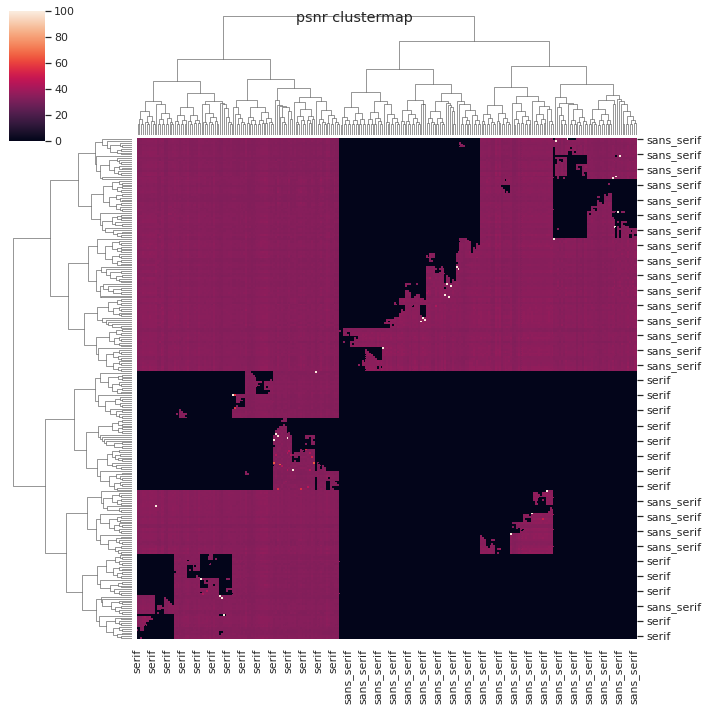

In [54]:
sns.clustermap(ptable).fig.suptitle('psnr clustermap') 

In [43]:
ptable.columns =  ['serif' if re.match('|'.join(serif_list), i) else 'sans_serif' for i in ptable.columns ]
ptable.index =  ['serif' if re.match('|'.join(serif_list), i) else 'sans_serif' for i in ptable.index ]

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(0.5, 0.98, 'ssim clustermap')

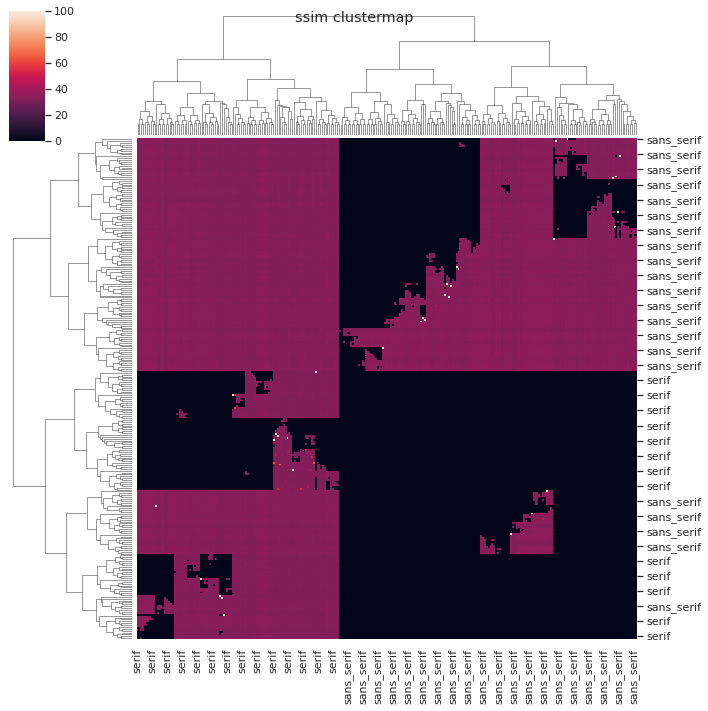

In [56]:
sns.clustermap(ptable).fig.suptitle('psnr clustermap') 

In [45]:

rcParams['figure.figsize'] = 300, 300

ax = sns.heatmap(ptable)

plt.savefig('psnr_heatmap.png', dpi=100)

In [32]:
def generate_ssim_error_columns(df):
    namepairs = np.array(list(combinations(df['font_name'].values, 2)))
    table = {r : { c : 0 for c in df['font_name'].unique()} for r in df['font_name'].unique()}
    for ind, i in enumerate(namepairs):
        pp = namepairs[ind]
        table[namepairs[ind][0]][namepairs[ind][1]] = ssim(get_A_font_by_name(re.escape(pp[0])), get_A_font_by_name(re.escape(pp[1])))
    table = pd.DataFrame(table)
    return table

In [33]:
stable = generate_ssim_error_columns(df)

In [34]:
stable

Alegreya[wght]  ...  WorkSans[wght]
Alegreya[wght]                 0.000000  ...               0
Alegreya-Italic[wght]          0.842174  ...               0
AlegreyaSans-ExtraBold         0.475303  ...               0
AlegreyaSans-Italic            0.610630  ...               0
AlegreyaSans-ThinItalic        0.326136  ...               0
...                                 ...  ...             ...
RubikOne-Regular               0.339406  ...               0
Urbanist[wght]                 0.661062  ...               0
Urbanist-Italic[wght]          0.514859  ...               0
WorkSans-Italic[wght]          0.407735  ...               0
WorkSans[wght]                 0.605145  ...               0

[266 rows x 266 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(0.5, 0.98, 'ssim clustermap')

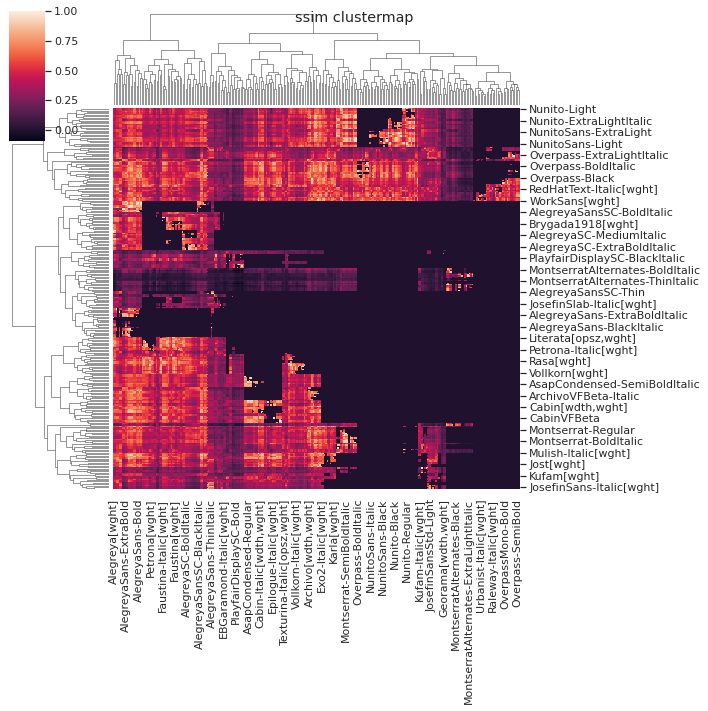

In [61]:
sns.clustermap(stable).fig.suptitle('ssim clustermap') 

In [35]:
stable.columns =  ['serif' if re.match('|'.join(serif_list), i) else 'sans_serif' for i in stable.columns ]
stable.index =  ['serif' if re.match('|'.join(serif_list), i) else 'sans_serif' for i in stable.index ]

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


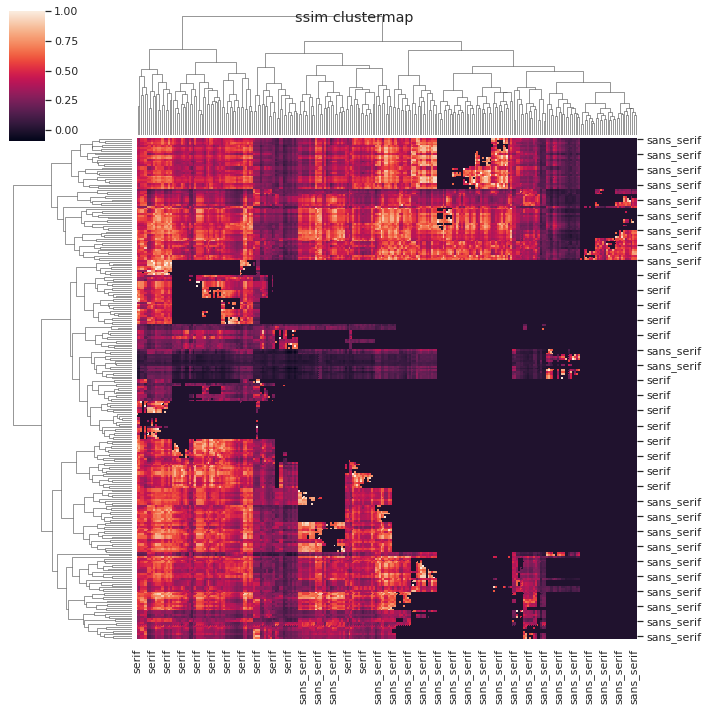

In [36]:
sns.clustermap(stable).fig.suptitle('ssim clustermap') 
plt.show()
# plt.savefig('stable.png').fig.suptitle('ssim clustermap') 